# CSMODEL
### Project 2 - Group 5
Members:
- Alon-alon, Jason Miguel E.
- Escalona, Jose Miguel A.
- Llorca, Marcelino Francis S.

### 1. Dataset Representation

The dataset that was chosen for this project was ***Dataset3.csv***. At first glance, the modelling method that seems to be possible to use is associative rule mining, based specifically on the raw structure of the data. But upon deeper inspection, it revealed that it may not be applicable to associative rule mining due to one key characteristic: the value is has a limited range of 1 to 5. This makes it more of a rating value rather than an indication of quantities of certain item types. Therefore, applying the idea of associative rule mining won't be of any use on the dataset since it does not make sense to limit the quantity of items/words that a customer/document must have on every go. 

Therefore, **the appropriate data modelling technique that must be applied on Dataset3 must be the recommender systems**, specifically the collaborative filtering approach.

The resulting DataFrame from Dataset3 has **300 columns and 100 rows** which by default is named as 0 to n. It could be noticed as well in the code that a column called *Unnamed: 0* has been removed that column implies the index values of the dataset when viewed in a spreadsheet application such as Microsoft Excel.

The rows represents a movie while the columns represent the users' rating of movie. **Effectively, the context of the project is that each observation the DataFrame contain the ratings (1-5) of 300 users of a specific movie.**

In [1]:
import pip
import pandas as pd
import time
import numpy as np

main_df = pd.read_csv('Dataset3.csv') #Dataset3 as chosen by the group
main_df.drop(columns='Unnamed: 0', inplace=True) #Dropping the first column which is named as 'Unnamed: 0'
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 300 entries, 0 to 299
dtypes: float64(300)
memory usage: 234.5 KB


The code below confirms the minimum and max values of the dataset being from 1-5.

In [2]:
print('Rating Value Range For User 0:\n',main_df.value_counts(subset=['0']).sort_index())
print('\nMin={:.0f} and Max={:.0f}'.format(main_df.min().min(),main_df.max().max()))

Rating Value Range For User 0:
 0  
1.0    20
2.0    18
3.0    11
4.0    10
5.0    21
dtype: int64

Min=1 and Max=5


For easy representation, an external dataset was used to serve as the index values of the DataFrame. The data was sourced from Devesh Kumar Rai's dataset in Kaggle. The dataset contains the titles of movies and its respective ratings from IMDB and Metascore as well as the number of votes of said movie.

The data preprocessing for this will be by sorting by IMDB rating afterwhich the resulting form of list will be used as a list for the indices of the *main_df*. The movie dataset was also cleaned prior to sorting since there are duplicates in the said data.

Another column will also be created (*movie_year*) to combine the names and year into one column for easy reference when searching.

Source: https://www.kaggle.com/raidevesh05/movie-ratings-dataset

In [3]:
movie_df = pd.read_csv('movie_ratings.csv')
movie_df.drop(columns='Unnamed: 0', inplace=True)
movie_df.drop_duplicates(subset='movie',inplace=True)
movie_df.sort_values(by='imdb',inplace=True,ascending=False)
movie_df['movie_year'] = movie_df.movie.map(str) +' ('+movie_df.year.map(str)+')' #https://stackoverflow.com/a/11858532
movie_df

,movie,year,imdb,metascore,votes,movie_year
1100,Game of Thrones,2011,9.5,NaN,1410281,Game of Thrones (2011)
801,Breaking Bad,2008,9.5,NaN,1159103,Breaking Bad (2008)
113,Band of Brothers,2001,9.5,NaN,307747,Band of Brothers (2001)
647,Planet Earth,2006,9.4,NaN,142671,Planet Earth (2006)
218,The Wire,2002,9.3,NaN,238822,The Wire (2002)
...,...,...,...,...,...,...
845,The Happening,2008,5.0,NaN,184319,The Happening (2008)
1147,The Twilight Saga: Breaking Dawn - Part 1,2011,4.9,NaN,205429,The Twilight Saga: Breaking Dawn - Part 1 (2011)
349,Charlie's Angels: Full Throttle,2003,4.9,NaN,111449,Charlie's Angels: Full Throttle (2003)
925,The Twilight Saga: New Moon,2009,4.7,NaN,245496,The Twilight Saga: New Moon (2009)


In [4]:
itemList = movie_df['movie_year'].to_list()
itemList = itemList[0:100] #limiting to row size
main_df.index = itemList
main_df['votes'] = main_df.count(axis=1).to_list()
main_df['imdb'] = movie_df['imdb'].iloc[0:100].to_list() #adjusts it to 1-5
print(main_df.info())   

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Game of Thrones (2011) to American Horror Story (2011)
Columns: 302 entries, 0 to imdb
dtypes: float64(301), int64(1)
memory usage: 236.7+ KB
None


In [5]:
#Resulting DataFrame
main_df

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,votes,imdb
Game of Thrones (2011),1.0,5.0,4.0,NaN,1.0,3.0,4.0,1.0,5.0,NaN,...,NaN,2.0,NaN,1.0,4.0,5.0,3.0,4.0,241,9.5
Breaking Bad (2008),NaN,NaN,5.0,3.0,4.0,1.0,4.0,NaN,NaN,1.0,...,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,243,9.5
Band of Brothers (2001),2.0,4.0,1.0,NaN,NaN,4.0,3.0,NaN,4.0,4.0,...,4.0,NaN,3.0,2.0,4.0,5.0,1.0,4.0,247,9.5
Planet Earth (2006),3.0,5.0,1.0,5.0,1.0,3.0,5.0,3.0,2.0,4.0,...,2.0,2.0,5.0,4.0,NaN,NaN,3.0,NaN,252,9.4
The Wire (2002),NaN,NaN,5.0,3.0,2.0,1.0,4.0,NaN,4.0,1.0,...,1.0,2.0,2.0,2.0,1.0,2.0,NaN,5.0,245,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Help (2011),1.0,5.0,5.0,2.0,NaN,NaN,3.0,2.0,4.0,5.0,...,NaN,5.0,NaN,2.0,5.0,4.0,3.0,4.0,240,8.1
Amores perros (2000),3.0,4.0,NaN,3.0,NaN,3.0,NaN,1.0,3.0,2.0,...,1.0,4.0,5.0,5.0,3.0,2.0,4.0,NaN,251,8.1
Donnie Darko (2001),2.0,2.0,2.0,NaN,4.0,1.0,1.0,4.0,5.0,3.0,...,5.0,2.0,5.0,4.0,2.0,NaN,4.0,4.0,237,8.1
Before Sunset (2004),1.0,5.0,NaN,NaN,1.0,5.0,5.0,4.0,4.0,NaN,...,5.0,4.0,NaN,3.0,3.0,5.0,3.0,2.0,244,8.1


### 2. Exploratory Data Analysis

**1. What is the average rating that most people give on any movie and what movies do belong equal and beyond such rating?**

In order to determine the overall average rating, the mean on every movie was determined (named as *mean_rating* column) afterwhich the mean_rating column's mean will be used as the overall average rating.

In [6]:
type(main_df.iloc[:,:300].mode(numeric_only=True,axis=1).iloc[0:100,0])

pandas.core.series.Series

Most Frequent Rating Value: 2.99


<AxesSubplot:ylabel='Frequency'>

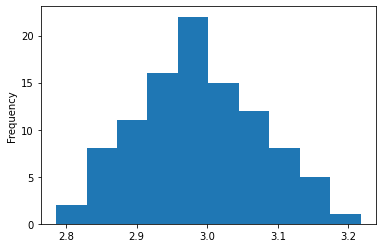

In [7]:
vis_df = pd.DataFrame()
trimmed_main = main_df.iloc[:,0:300]
vis_df['mean_rating'] = trimmed_main.mean(axis=1) #Average rating on every movie
vis_df['mode_rating'] = trimmed_main.mode(numeric_only=True,axis=1).iloc[0:100,0]
overall_mean = vis_df['mean_rating'].mean()
print('Most Frequent Rating Value: {:.2f}'.format(overall_mean)) #Average of mean_rating column in main_df
vis_df['mean_rating'].plot.hist(bins=10)

Taking on the second part of the first question, what are the list of movies that achieved a minimum of 3 for the mean rating.

In [8]:
vis_df = vis_df[vis_df['mean_rating'] >= overall_mean].sort_values(by='mean_rating', ascending=False)
vis_df

,mean_rating,mode_rating
Sons of Anarchy (2008),3.217213,3.0
The Intouchables (2011),3.160000,4.0
It's Always Sunny in Philadelphia (2005),3.157895,5.0
Mindhunter (2017),3.155378,4.0
Snatch (2000),3.142857,3.0
The Wolf of Wall Street (2013),3.132296,5.0
Batman Begins (2005),3.125475,4.0
The Help (2011),3.112500,4.0
Sherlock (2010),3.104247,2.0
Inside Out (2015),3.103586,5.0


### 3. Data Mining

**INSTRUCTIONS FOR COLLABORATIVE FILTERING**
- Use the collaborative_filtering.py file from our exercises. Make sure that your code is working properly. Set k to 5.
- Perform collaborative filtering.
- Answer the question: Give the top 5 items that are most similar to the item at index 0.

In [9]:
from Collab import CollaborativeFiltering #Do change source file to which ever is faster if there exists as such
k = 5
miner = CollaborativeFiltering(k)
print('Miner_Collab k value:', k)

Miner_Collab k value: 5


**From specification (Data Mining):**<br>
Answer the question: Give the top 5 items that are most similar to the item at index 0.

The *itemList* is synchronous to the indices of the DataFrame thus the list's 0th index is also the DF's 0th index. 

In [10]:
filter_df = main_df.iloc[:,0:300]
item = filter_df.loc[itemList[0], :]
drop_item = filter_df.drop(itemList[0])
similar_items = miner.get_k_similar(drop_item, item)
print('Item: {:}\n========================================\nSimilar Items:\n{:}\n========================================'.format(itemList[0],similar_items[1].nlargest(5).round(4)))

Item: Game of Thrones (2011)
Similar Items:
The Punisher (2017)        0.1499
Mindhunter (2017)          0.1254
The Walking Dead (2010)    0.1166
Modern Family (2009)       0.1158
Stranger Things (2016)     0.1028
dtype: float64


Finding what 'features' are similar to the input and recommended movies.

In [11]:
#Finding commonlaties amongst its ratings
combined_list = [itemList[0]] + similar_items[0]
filtered_main = pd.DataFrame([main_df[main_df.index.isin(combined_list)].count(axis=1),main_df[main_df.index.isin(combined_list)].mean(axis=1)])
filtered_main = filtered_main.transpose()
filtered_main.columns = ['votes','user_rating']
filtered_movie = movie_df[movie_df['movie_year'].isin(combined_list)]
print('Mean Rating from Users:\n{:}\n{:}'.format(filtered_main,'========================================'))
print('Ratings From IMDB:\n',filtered_movie[{'movie_year','imdb','votes'}],'\n========================================')

Mean Rating from Users:
                         votes  user_rating
Game of Thrones (2011)   243.0     3.989712
Stranger Things (2016)   256.0     4.054297
The Punisher (2017)      259.0     3.840154
Mindhunter (2017)        253.0     4.156126
Modern Family (2009)     261.0     4.005364
The Walking Dead (2010)  247.0     3.997166
Ratings From IMDB:
                    movie_year    votes  imdb
1100   Game of Thrones (2011)  1410281   9.5
1602   Stranger Things (2016)   559626   8.9
1738      The Punisher (2017)   135366   8.6
1746        Mindhunter (2017)   111213   8.5
916      Modern Family (2009)   306167   8.4
1002  The Walking Dead (2010)   771362   8.3 


Comparing the mean rating of users, 

Show Genres (according to IMDB)

**Common to Game of Thrones**<br>
*Common amongst recommendations*

1. Game of Thrones: **Action**, Adventure, **Drama**, **Fantasy**
2. The Punisher: **Action**, *Crime*, **Drama**, *Thriller*
3. Mindhunter: *Crime*, **Drama**, *Thriller*
4. The Walking Dead: **Drama**, *Horror*, *Thriller*
5. Modern Family: Comedy, **Drama**, Romance
6. Stranger Things: **Drama**, **Fantasy**, *Horror*, Mystery, Sci-Fi, *Thriller*
